In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nf
from netCDF4 import Dataset
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [2]:
datapath="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/Data/ECMWF/ERA5_25kmx3hr/"
target="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/create_ts/outputs/targets/"
p1="/work/FAC/FGSE/IDYST/tbeucler/default/saranya/create_ts/"

In [527]:
dm1=xr.open_dataset(datapath+'/mslp/mslp_2019.nc')

In [529]:
track=pd.read_csv(p1+'tracks_nio/nio_20190101.csv',delimiter=r",")
lon1=track['lon'].to_numpy()
lat1=track['lat'].to_numpy()
pos = arr = np.stack((lat1, lon1), axis=1)
pos.shape

(45, 2)

In [443]:
#wp start from 2014
#2018 jelawat 650:733
#maliksi 1230:1294
#kongrey 2156:2232
#yutu 2342:2451


#muifa 894:947
#lan 2296:2360
#damrey 2424:2465
#haikul 2484:2541



#megi 2120:2183
#sarika 2286:2347
#haima 2298:2367


#maysak 670:769
#mujigae 2176:2219
#koppu 2272:2347
#infa 2558:2639

#tapah 924:971
#nuri 2416:2478
#hagupit 2666:2765

#yagi 1254:1319
#fitow 2170:2235
#danas 2184:2248
#francisco 2300:2386
#krosa 2398:2463
#haiyan 2444:2519


#guchol 1288:1367
#gaemi 2176:2245
#maria 
#sontinh 2356:2421
#bopha 2636:2747


#songda 1110:1186
#2011 haima 1330:1407
#nalgae 2148:2221
#washi 2758:2819


In [530]:
track['time'].info()

track['time'][0]

<class 'pandas.core.series.Series'>
RangeIndex: 45 entries, 0 to 44
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
45 non-null     object
dtypes: object(1)
memory usage: 488.0+ bytes


'2019-01-01:03.00.00'

In [531]:
track['time'][44]

'2019-01-06:12.00.00'

In [534]:
dm1.time[0:45]

<xarray.DataArray 'time' (time: 45)>
array(['2019-01-01T00:00:00.000000000', '2019-01-01T03:00:00.000000000',
       '2019-01-01T06:00:00.000000000', '2019-01-01T09:00:00.000000000',
       '2019-01-01T12:00:00.000000000', '2019-01-01T15:00:00.000000000',
       '2019-01-01T18:00:00.000000000', '2019-01-01T21:00:00.000000000',
       '2019-01-02T00:00:00.000000000', '2019-01-02T03:00:00.000000000',
       '2019-01-02T06:00:00.000000000', '2019-01-02T09:00:00.000000000',
       '2019-01-02T12:00:00.000000000', '2019-01-02T15:00:00.000000000',
       '2019-01-02T18:00:00.000000000', '2019-01-02T21:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-01-03T03:00:00.000000000',
       '2019-01-03T06:00:00.000000000', '2019-01-03T09:00:00.000000000',
       '2019-01-03T12:00:00.000000000', '2019-01-03T15:00:00.000000000',
       '2019-01-03T18:00:00.000000000', '2019-01-03T21:00:00.000000000',
       '2019-01-04T00:00:00.000000000', '2019-01-04T03:00:00.000000000',
       '2019-01-04T06:00:00.000000000', '2019-01-04T09:00:00.000000000',
       '2019-01-04T12:00:00.000000000', '2019-01-04T15:00:00.000000000',
       '2019-01-04T18:00:00.000000000', '2019-01-04T21:00:00.000000000',
       '2019-01-05T00:00:00.000000000', '2019-01-05T03:00:00.000000000',
       '2019-01-05T06:00:00.000000000', '2019-01-05T09:00:00.000000000',
       '2019-01-05T12:00:00.000000000', '2019-01-05T15:00:00.000000000',
       '2019-01-05T18:00:00.000000000', '2019-01-05T21:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-01-06T03:00:00.000000000',
       '2019-01-06T06:00:00.000000000', '2019-01-06T09:00:00.000000000',
       '2019-01-06T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 ... 2019-01-06T12:00:00
Attributes:
    standard_name:  time
    axis:           T

In [505]:
#amphan [[48:99] (may 14.00.00 to may 20.06.00)
#vongfong [2:83] (may 8 06.00 to may 18. 06.00) 
#chanhom oct 3.06.00 to oct 16.21.00 [2:112]
#saudel oct.16.12.00 to oct.26.06.00 [108:187]
#molave oct.21.18.00 to oct.29.00.00 [150:209] 
#goni oct.25.06.00.00 to nov.6.06.00 [178:275] 2386 : 2483
#atsani oct.29.12.00 to nov.07.15.00 [212:286] [2420:2494]
#vamco nov.8.00.00 to nov.16.06.00 [288:355]

In [535]:
dm0=dm1.var151[0:45]

In [536]:
tc_irad=np.empty((pos.shape[0],4))
tc_irad[:,0] = pos[:,0]-5
tc_irad[:,1] = pos[:,0]+5
tc_irad[:,2] = pos[:,1]-5
tc_irad[:,3] = pos[:,1]+5

In [537]:
pmin=np.zeros((pos.shape[0],40,40))
slp=np.zeros((tc_irad.shape[0],))

In [538]:
slp.shape

(45,)

In [539]:
for it in range(tc_irad.shape[0]):
    latn, lats, lone, lonw = tc_irad[it,:]
    #test.append(dm.slp[it,:,:].sel(lat=slice(latn,lats),lon=slice(lone,lonw)))
    pmin[it,:,:]=dm0[it,:,:].sel(lat=slice(lats,latn),lon=slice(lone,lonw))[0:40,0:40]
    slp[it]=np.min(pmin[it,:,:])

In [540]:
slp=slp/100

In [541]:
slp

array([1006.001875, 1006.361875, 1003.89375 , 1002.906875, 1004.1825  ,
       1004.449375, 1003.071875, 1001.76625 , 1003.54125 , 1004.44    ,
       1001.928125, 1000.420625, 1003.394375, 1004.249375, 1002.885   ,
       1001.26125 , 1002.7375  , 1004.763125, 1002.796875, 1000.441875,
       1001.098125, 1002.89375 , 1002.74875 , 1001.89375 ,  999.885625,
       1001.5475  , 1003.16    , 1003.10375 , 1005.813125, 1008.533125,
       1008.376875, 1006.9125  , 1008.54375 , 1009.77375 , 1007.93125 ,
       1005.7025  , 1007.32375 , 1008.493125, 1007.7625  , 1006.21    ,
       1008.384375, 1010.29125 , 1009.155   , 1006.754375, 1008.021875])

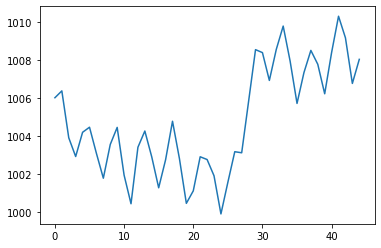

In [542]:
plt.plot(slp)
plt.show()

In [543]:
df = pd.DataFrame(data=slp, columns=["Pmin"])

In [544]:
df.to_csv(target+'2019_pmin_nio_pabuk.csv')